# III - Data Analysis with ChiVO

## ACALib

ACALib is a ChiVO library for advanced computing for astronomical data. The stable version can be installed using ``pip``, the development version can be found at [github](https://github.com/ChileanVirtualObservatory/acalib) and the documentation is at [ReadTheDocs](http://acalib.readthedocs.io/en/latest/)




In [1]:
import os
import urllib.request
import tarfile
import sys

global DOWNLOADS_DIR 
DOWNLOADS_DIR= '.'

def download_and_extract(url):
    # Obtain the filename
    name = url.rsplit('/', 1)[-1]
    filename = os.path.join(DOWNLOADS_DIR, name)
    # Download the file if not found
    if not os.path.isfile(filename):
        urllib.request.urlretrieve(url, filename)
    # Decompress (if needed) and copy the selected file to the DOWNLOADS_DIR
    sdir=filename.rsplit('ReferenceImages',1)[0]+"ReferenceImages"
    if not os.path.isdir(sdir):
        tar = tarfile.open(filename)
        tar.extractall(path=DOWNLOADS_DIR)
        tar.close()

In [2]:
m100_url='https://bulk.cv.nrao.edu/almadata/sciver/M100Band3_12m/M100_Band3_ReferenceImages_CASA3.3.tgz'
download_and_extract(m100_url)

In [3]:
!ls M100_Band3_ReferenceImages

M100-CO_contmap.png  M100-CO.mom1.fits	   M100line.image.fits
M100-CO_map.png      M100cont.image.fits
M100-CO.mom0.fits    M100-CO_velfield.png


In [4]:
import warnings
warnings.filterwarnings('ignore')
import acalib

In [5]:
M100=acalib.loadme("M100_Band3_ReferenceImages/M100line.image.fits")

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 4D Detected: Assuming RA-DEC-FREQ-STOKES, and dropping STOKES [acalib.io.fits]


### Data and Table Classes
ACALib uses Astropy's Tables and N-Dimensional Data classes for all operations. These classes are called Tables and Data.

In [6]:
type(M100)
M100.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  
CRVAL : 185.72874999999999  15.81944444444  114587503125.0  
CRPIX : 301.0  301.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.0001388888888889  0.0001388888888889  3906250.0  
NAXIS    : 600 600

## User Programmatic Interface (UPI)

In [7]:
M100_m0 = M100.moment0()

In [8]:
M100_m0.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 185.72874999999999  15.81944444444  
CRPIX : 301.0  301.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0001388888888889  0.0001388888888889  
NAXIS    : 600 600

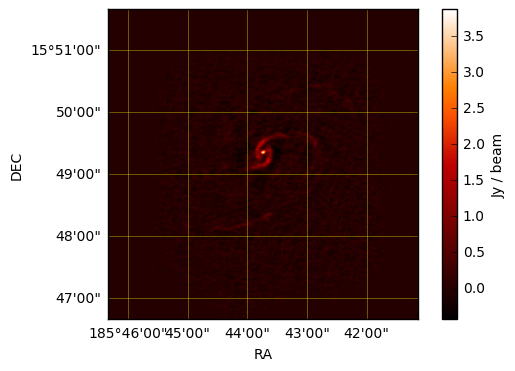

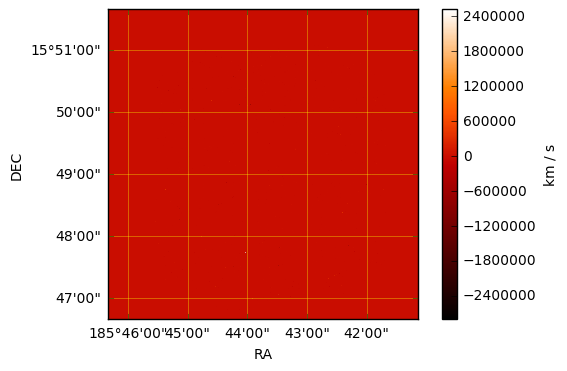

In [9]:
M100_m0.visualize()
acalib.visualize(M100.moment1())

In [10]:
M100.axes_names()

array(['FREQ', 'DEC', 'RA'], 
      dtype='<U4')

In [11]:
M100.axes_units()

array([Unit("Hz"), Unit("deg"), Unit("deg")], dtype=object)

In [12]:
ini,end=M100.extent()

In [13]:
ini

array([<Quantity 114587503125.0 Hz>, <Quantity 15.777773482289602 deg>,
       <Quantity 185.77204798519327 deg>], dtype=object)

In [14]:
end

array([<Quantity 114743753125.0 Hz>, <Quantity 15.861106821199073 deg>,
       <Quantity 185.6854341680921 deg>], dtype=object)

In [15]:
center=M100.center()
center

array([<Quantity 114587503125.0 Hz>, <Quantity 15.81944444444 deg>,
       <Quantity 185.72875 deg>], dtype=object)

In [16]:
resolution=M100.resolution()
resolution

array([<Quantity 3906250.0 Hz>, <Quantity 0.0001388888888889 deg>,
       <Quantity -0.0001388888888889 deg>], dtype=object)

In [17]:
M100.rms()

<Quantity 0.007457160104435732 Jy / beam>

In [18]:
help(M100.opening)

Help on method opening in module acalib.upi.data:

opening(center, window) method of acalib.upi.data.Data instance
    Field of view (center +- window) converted to indices
    
    Parameters
    ----------
    center : astropy.units.quantity.Quantity
        Center of the field of view in WCS.
    window : astropy.units.quantity.Quantity
        Window for the field in WCS.
    
    Returns
    -------
    result: ((M1,N1,Z1),(M2,N2,Z2)) tuple of tuple of ints



In [19]:
lower,upper=M100.opening(center,20*resolution)
lower

array([  0, 280, 281])

In [20]:
upper

array([ 20, 320, 319])

In [21]:
M100cut=M100.cut(lower=lower,upper=upper)

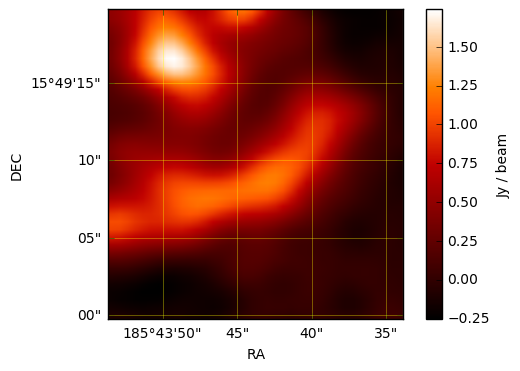

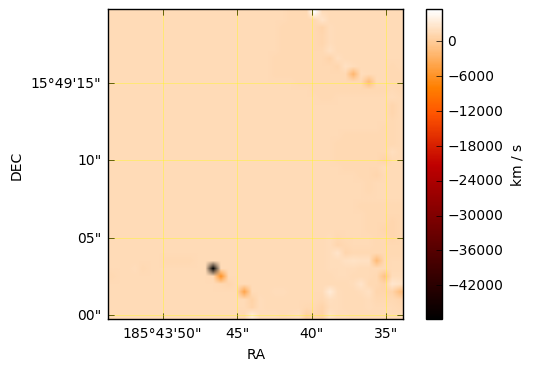

In [22]:
acalib.visualize(M100cut.moment0())
acalib.visualize(M100cut.moment1())

In [23]:
table=M100cut.features()

In [24]:
table

FREQ,DEC,RA
Hz,deg,deg
float64,float64,float64
114587503125.0,15.8166666494,185.731492732
114587503125.0,15.8166666512,185.731348378
114587503125.0,15.8166666529,185.731204024
114587503125.0,15.8166666545,185.731059669
114587503125.0,15.8166666559,185.730915315
114587503125.0,15.8166666573,185.730770961
114587503125.0,15.8166666586,185.730626606
114587503125.0,15.8166666598,185.730482252


In [25]:
table.show_in_notebook()

idx,FREQ,DEC,RA
,Hz,deg,deg
0,114587503125.0,15.8166666494,185.731492732
1,114587503125.0,15.8166666512,185.731348378
2,114587503125.0,15.8166666529,185.731204024
3,114587503125.0,15.8166666545,185.731059669
4,114587503125.0,15.8166666559,185.730915315
5,114587503125.0,15.8166666573,185.730770961
6,114587503125.0,15.8166666586,185.730626606
7,114587503125.0,15.8166666598,185.730482252
8,114587503125.0,15.8166666609,185.730337898


### Interactive Background Estimation 

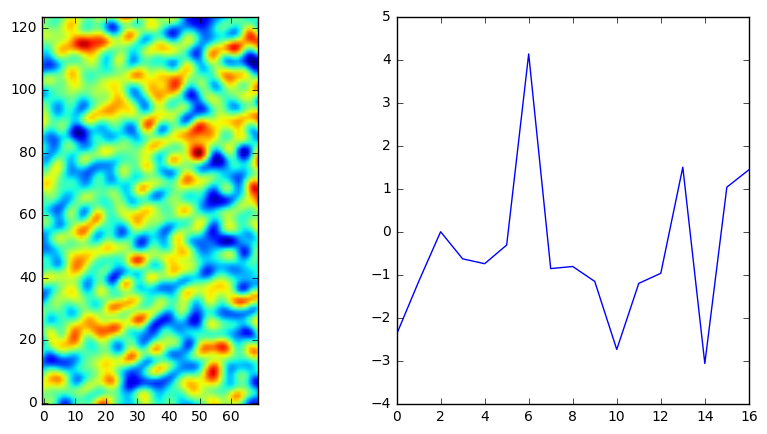

In [42]:
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt


cube=M100
ra_max   = cube.meta['NAXIS1']
dec_max  = cube.meta['NAXIS2']
spec_max = cube.meta['NAXIS3']

def cut_and_show(rlow=0,rhigh=ra_max,
                 dlow=0,dhigh=dec_max,
                 slow=0,shigh=spec_max):
    tmp=cube.data[slow:shigh,dlow:dhigh,rlow:rhigh]
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(np.nansum(tmp,axis=(0)),origin='lower')
    plt.subplot(1,2,2)
    plt.plot(np.nansum(tmp,axis=(1,2)))
    plt.show()

res=interact(cut_and_show,
             rlow=(0,ra_max), rhigh=(0,ra_max),
             dlow=(0,dec_max),dhigh=(0,dec_max),
             slow=(0,spec_max),shigh=(0,spec_max))

In [44]:
limits=res.widget.kwargs

In [45]:
lower        = [limits['slow'],limits['dlow'],limits['rlow']]
upper       = [limits['shigh'],limits['dhigh'],limits['rhigh']]
noisecube = cube.cut(lower=lower,upper=upper)

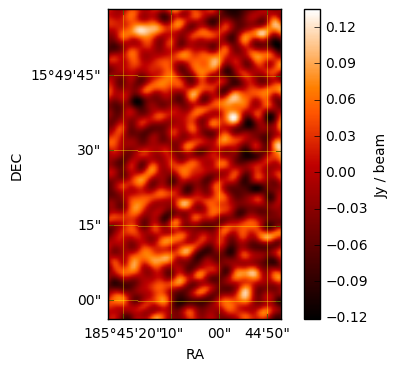

In [46]:
acalib.visualize(noisecube.moment0())

In [47]:
noise_level=noisecube.rms()
noise_level

<Quantity 0.007877063039757017 Jy / beam>

### Interactive Region Selection

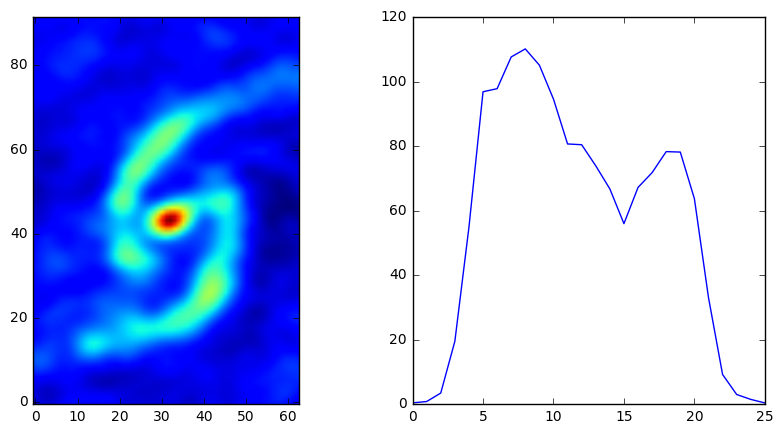

In [128]:
cube=M100
res=interact(cut_and_show,
             rlow=(0,ra_max), rhigh=(0,ra_max),
             dlow=(0,dec_max),dhigh=(0,dec_max),
             slow=(0,spec_max),shigh=(0,spec_max))

In [129]:
limits=res.widget.kwargs
lower        = [limits['slow'],limits['dlow'],limits['rlow']]
upper       = [limits['shigh'],limits['dhigh'],limits['rhigh']]

### Thresholding

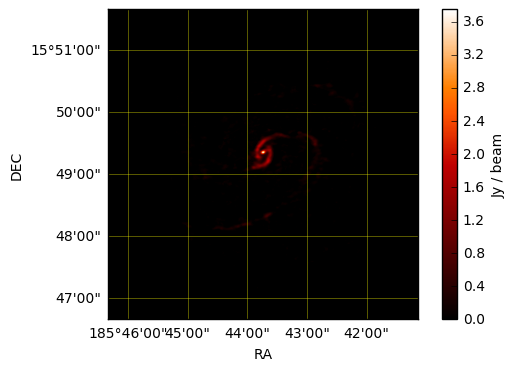

In [130]:
%matplotlib inline
import numpy as np
# Copy the Data
dencube=acalib.Data(M100,copy=True)
mmap = dencube.data< 3*noise_level.value
dencube.data[mmap]=np.NaN
dencube.mask[mmap]=True
dencube.moment0().visualize()

In [131]:
M100core = dencube.cut(lower,upper)

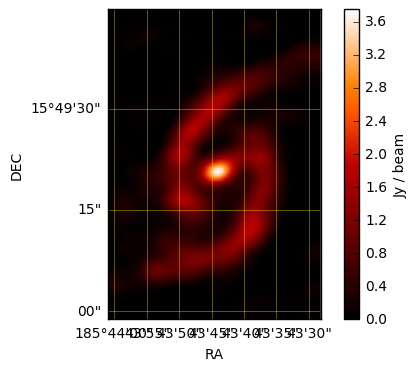

In [132]:
%matplotlib inline
M100core.moment0().visualize()

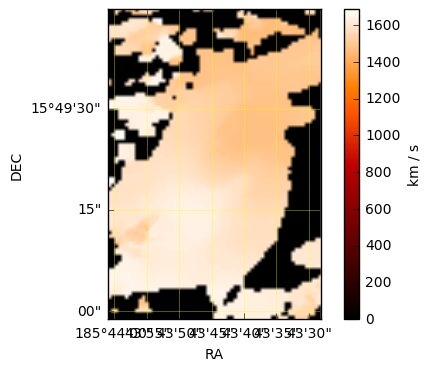

In [133]:
%matplotlib inline
M100core.moment1().visualize()

In [134]:
%matplotlib inline

### Clumpfind

In [143]:
cf=acalib.ClumpFind()
cf.config['RMS']=noise_level.value
cf.config

{'ALLOWEDGE': 0,
 'FWHMBEAM': 2.0,
 'IDLALG': 0,
 'MINPIX': 10,
 'NAXIS': 2,
 'RMS': 0.007877063039757017,
 'VELORES': 2.0}

In [150]:
coreM0 = M100core.moment0()
res=cf.run(coreM0)

In [151]:
(caa,pix)=res
pix.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

IndexError: index 40 is out of bounds for axis 0 with size 40

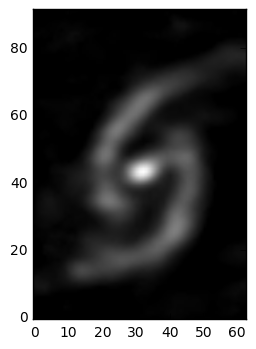

In [152]:
nax=plt.imshow(coreM0.data.data,cmap="gray",origin='lower')
color=plt.cm.rainbow(np.linspace(0,1,len(pix.keys())-1))
for i in pix.keys():
    if i == -1:
        continue
    tmp=cube.data.copy()
    tmp[caa.data!=i]=0.0
    plt.contour(tmp.sum(axis=(0)),levels=[0.0],colors=[color[i]])
plt.show()

## What is JOVIAL

Jovial is a webapp for programming-oriented astronomical data analysis:
* It is basically a cloud environment based on Jupyter Notebooks (python)
* No installation required! (for the on-line version)
* Brings computations where the data is (data centers)

The current JOVIAL status is alpha, but we are moving to beta today! 
* Not all the planned functionalities are available
* The service might be unstable due to heavy development
* We need to improve connectivity to archives or replicate more data

## How it works

Jovial is a user-based service:
* Jovial allocates a special workspace for the user, and runs a light-weighted virtual machine dedicated to the user.
* You can run console and python scripts, but we strongly recommend using Notebooks!
* Parallel computations are possible right now using the computing nodes of the data center, but there is no easy-to-use interface yet (WIP).


